In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity

In [2]:
nobs = 721549
neval = 2000
np.random.seed(1234)  # Seed random generator
c1 = np.random.normal(0, 2, size=(nobs,1))
c2 = np.random.normal(2, 2, size=(nobs,1))
c1s = c1[:neval]
c2s = c2[:neval]
cc12 = np.hstack([c1,c2])
cc12s = cc12[:neval, :]
# cc12

In [3]:
dens_u = sm.nonparametric.KDEMultivariate(data=[c1,c2],var_type='cc', bw='normal_reference')
dens_u

KDE instance
Number of variables: k_vars = 2
Number of samples:   nobs = 721549
Variable types:      cc
BW selection method: normal_reference

In [4]:
%%time
a = dens_u.pdf([c1s,c2s])
thres_multiplier = np.e ** (2.0 ** 2 / 2)   # 2.0 sigma, normal dist., +- sigma number 
thres = max(a) / thres_multiplier
thres_idx_1 = a >= thres
idx_1 = thres_idx_1    # alias

CPU times: user 46.8 s, sys: 9.74 s, total: 56.5 s
Wall time: 56.5 s


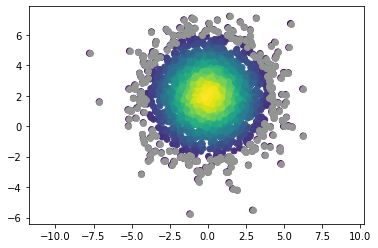

In [5]:
plt.scatter(c1s, c2s, c=a)
plt.scatter(c1s[~idx_1], c2s[~idx_1], color='xkcd:gray')
plt.axis('equal');

In [6]:
%%time
kernel = gaussian_kde(cc12.T)
z = kernel(cc12s.T)

CPU times: user 20.9 s, sys: 232 ms, total: 21.1 s
Wall time: 20.8 s


In [7]:
thres_multiplier = np.e ** (2.0 ** 2 / 2)   # 2.0 sigma, normal dist., +- sigma number 
thres = max(z) / thres_multiplier
thres_idx_2 = z >= thres
idx_2 = thres_idx_2    # alias

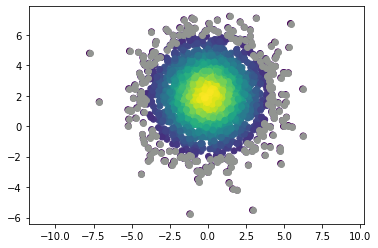

In [8]:
plt.scatter(c1s, c2s, c=z)
plt.scatter(c1s[~idx_2], c2s[~idx_2], color='xkcd:gray')
plt.axis('equal');

In [9]:
%%time
# kde = KernelDensity(kernel='gaussian', bandwidth=c1.size **(-1./(2+4))).fit(cc12)
kde = KernelDensity(kernel='gaussian', bandwidth=2 * c1.size **(-1./(2+4))).fit(cc12)
# kde = KernelDensity(kernel='gaussian', bandwidth=0.6).fit(cc12)
log_density = kde.score_samples(cc12s)
density = np.exp(log_density)

CPU times: user 1min 37s, sys: 48.1 ms, total: 1min 37s
Wall time: 1min 37s


In [10]:
thres_multiplier = np.e ** (2.0 ** 2 / 2)   # 2.0 sigma, normal dist., +- sigma number 
thres = max(density) / thres_multiplier
thres_idx_3 = density >= thres
idx_3 = thres_idx_3    # alias

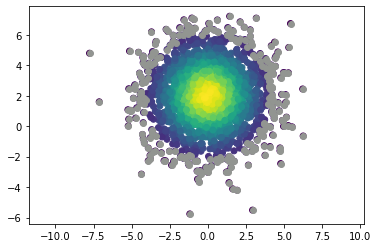

In [11]:
plt.scatter(c1s, c2s, c=density)
plt.scatter(c1s[~idx_3], c2s[~idx_3], color='xkcd:gray')
plt.axis('equal');

In [12]:
%%time
# kde2 = KernelDensity(kernel="epanechnikov", bandwidth=c1.size **(-1./(2+4))).fit(cc12)
# kde2 = KernelDensity(kernel="epanechnikov", bandwidth=0.6).fit(cc12)
# kde2 = KernelDensity(kernel="epanechnikov", bandwidth=2 * 0.6).fit(cc12)
kde2 = KernelDensity(kernel="epanechnikov", bandwidth=2.1991 * 2 * c1.size **(-1. / (2 + 4))).fit(cc12)
log_density2 = kde2.score_samples(cc12s)
density2 = np.exp(log_density2)

CPU times: user 3.49 s, sys: 7.47 ms, total: 3.5 s
Wall time: 3.49 s


In [13]:
thres_multiplier = np.e ** (2.0 ** 2 / 2)   # 2.0 sigma, normal dist., +- sigma number 
thres = max(density2) / thres_multiplier
thres_idx_4 = density2 >= thres
idx_4 = thres_idx_4    # alias

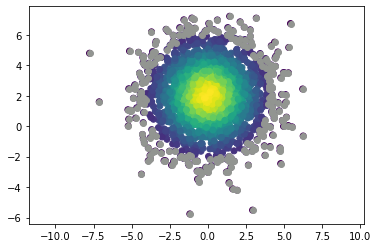

In [14]:
plt.scatter(c1s, c2s, c=density2)
plt.scatter(c1s[~idx_4], c2s[~idx_4], color='xkcd:gray')
plt.axis('equal');